Part (A): IMPORTING THE STANDARD MNIST DATASET (TRAINING AND TESTING DATASETS) AND PROCESSING THE IMPORTED DATASETS


In [ ]:
### IMPORT NECESSARY PACKAGES ###

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

11501568/11490434 [==============================] - 0s 0us/step
The 4th image in the training dataset looks like this:


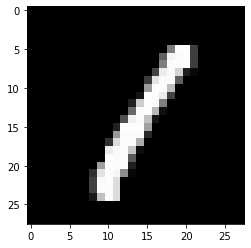

Image label of 4th image: 1
Image label of 4th image after one-hot encoding:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
### IMPORT THE MNIST DATASET ###

# x_train - training images, y_train - labels of training images
# x_test - testing images, y_test - labels of testing images

(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28 # pixel size of images in MNIST
num_classes = 10 # number of image labels. In our case the label can take 10 values (digits 0-9)


# DATASET PROCESSING

# Converting images to size (Num_Images,28,28,1), where Num_Images is 60000 for the training dataset, and 10000 for the test dataset 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# DISPLAYING A SAMPLE TRAINING IMAGE OF RESOLUTION 28x28
print('The 4th image in the training dataset looks like this:')
plt.imshow(x_train[3,:].reshape((28,28)), cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()


# NORMALIZE THE IMAGE PIXEL VALUES TO LIE BETWEEN 0 AND 1
x_train /= 255
x_test /= 255



# CONVERT THE SCALAR IMAGE LABELS TO 10-dim VECTORS USING ONE-HOT ENCODING SCHEME

print('Image label of 4th image: '+np.str(y_train[3]))

# USE THE FOLLOWING 2 LINES FOR NEW VERSION OF KERAS
# ONE-HOT ENCODING SCHEME - CONVERT INTEGERS TO VECTORS.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

print('Image label of 4th image after one-hot encoding: ',np.str(y_train[3]))


PART (B): CREATE THE CONVOLUTIONAL NEURAL NETWORK USING KERAS AND TRAIN THE NEURAL NETWORK USING THE MNIST TRAINING DATASET.

In [ ]:
 ### CREATE MODEL - 2 CONVOLUTIONAL LAYERS FOLLOWED BY 2 DENSE (FULLY-CONNECTED) LAYERS ###

 
# ACTIVATION FUNCTION USED - RELU #
model = Sequential()

# Convolutional layer #1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Convolutional layer #2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))   # Dropout feature randomly removes certain layer-to-layer connections at each weight update, improving robustness of learning.
model.add(Flatten())  # data is now in the form of a large column matrix.

# Fully connected layer #1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Fully connected layer #2
model.add(Dense(num_classes, activation='softmax')) 
# softmax generates a 10-dimensional probability vector as the output (sum of elements =1)
# Value of component i is the confidence the neural network classifies image as digit (i-1)



# SPECIFY THE OBJECTIVE FUNCTION TO BE MINIMIZED AND THE OPTIMIZATION ALGORITHMS TO BE USED

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])
print(model.summary())

### PICTORIAL REPRESENTATION OF THE NEURAL NETWORK ###
#plot_model(model, to_file='model_summary_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
### TRAIN ABOVE MODEL ON MNIST TRAINING DATASET ####

# DESCRIPTION OF TRAINING PARAMETERS
# BATCH_SIZE = how many images needed for updating network weights
# EPOCHS = determines total number of network weight updates. 
# Specifically, total number of weight updates = EPOCHS*(TRAINING_DATASET_SIZE/BATCH_SIZE)


batch_size = 128  # THIS IS BATCH STOCHASTIC GRADIENT. Pure STOCHASTIC GRADIENT => batch_size = 1.
epochs = 10

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test) )



Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 1.4084 - accuracy: 0.6344 - val_loss: 1.1861 - val_accuracy: 0.7908
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 1.2633 - accuracy: 0.6579 - val_loss: 1.0293 - val_accuracy: 0.8029
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 1.1487 - accuracy: 0.6789 - val_loss: 0.9076 - val_accuracy: 0.8179
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 1.0614 - accuracy: 0.6952 - val_loss: 0.8153 - val_accuracy: 0.8274
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.9846 - accuracy: 0.7128 - val_loss: 0.7438 - val_accuracy: 0.8349
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.9309 - accuracy: 0.7233 - val_loss: 0.6877 - val_accuracy: 0.8423
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.8809 - accuracy: 0.7376 - val_loss: 0.6430 - val_accuracy: 0.8480
Epoch

History of training accuracy:
[0.6343500018119812, 0.6578999757766724, 0.6788833141326904, 0.6952000260353088, 0.7128333449363708, 0.7233333587646484, 0.7375500202178955, 0.7484166622161865, 0.7564166784286499, 0.7663499712944031]


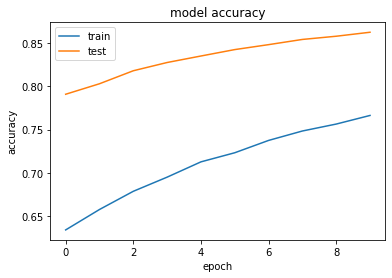

In [ ]:
### PLOT THE TRAINING AND TESTING ACCURACY AS A FUNCTION OF TRAINING EPOCHS ###

print('History of training accuracy:')
print(history.history['accuracy'])


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

PART (C): DRAW AN IMAGE OF ANY DIGIT FROM 0-9. SEE HOW THE TRAINED MODEL PREDICTS THE HAND-DRAWN IMAGE

In [ ]:
# IMAGE PROCESSING TO CONVERT HAND-DRAWN IMAGE TO GRAYSCALE AND SIZE 28x28  

#############   (UNCLEAN : CAN BE MADE MORE EFFICIENT)     #################

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image

img = cv2.imread('hand_5.png', cv2.IMREAD_UNCHANGED)
img_rgb = img[:, :,0:3]

print(img_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_gray = np.zeros(np.shape(img_rgb)[0:2])
img_gray = 0.2989*img_rgb[:,:,0] + 0.5870*img_rgb[:,:,1] +  0.1140*img_rgb[:,:,2]
print(img_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_gray_neg = 255.0 - img_gray

# RESIZE IMAGE TO 28x28 RESOLUTION
im = Image.fromarray(img_gray_neg)
im = im.convert('RGB')
im = im.resize((28,28))
im.save("hand_5_resized.jpg")

# SHOW CONVERTED GRASCALE 28x28 image
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
im_mat = np.asarray(im)
img_mat_gray = 0.2989*im_mat[:,:,0] + 0.5870*im_mat[:,:,1] +  0.1140*im_mat[:,:,2]

In [ ]:
img_9 = cv2.imread('hand_9.png', cv2.IMREAD_UNCHANGED)
img_9_rgb = img_9[:, :,0:3]

print(img_9_rgb.shape)

# CONVERT RGBA format (4 channels) TO GRAYSCALE (1 channel)
img_9_gray = np.zeros(np.shape(img_9_rgb)[0:2])
img_9_gray = 0.2989*img_9_rgb[:,:,0] + 0.5870*img_9_rgb[:,:,1] +  0.1140*img_9_rgb[:,:,2]
print(img_9_gray.shape)

# CHANGE BACKGROUND FROM WHITE TO BLACK, INK FROM BLACK TO WHITE
img_9_gray = 255.0 - img_9_gray

# RESIZE IMAGE TO 28x28 RESOLUTION
im_9 = Image.fromarray(img_9_gray)
im_9 = im_9.convert('RGB')
im_9 = im_9.resize((28,28))
im_9.save("hand_9_resized.jpg")

# SHOW CONVERTED GRASCALE 28x28 image
plt.imshow(im_9,cmap='gray',vmin=0,vmax=255)
im_9_mat = np.asarray(im_9)
img_9_mat_gray = 0.2989*im_9_mat[:,:,0] + 0.5870*im_9_mat[:,:,1] +  0.1140*im_9_mat[:,:,2]


In [ ]:
# TEST THE GRAYSCALE IMAGE (CONVERTED IN PREVIOUS CELL) ON THE NEURAL NETWORK
img_for_test  = np.zeros((1,28,28,1))
img_for_test[0,:,:,0] = img_9_mat_gray/255.0  ### REMEMBER THE PIXEL VALUES HAVE TO LIE WITHIN 0,1
prediction = model.predict(img_for_test)

# PRINT ONE-HOT ENCODED VALUE AND LARGEST INDEX
print('Softmax output for hand-drawn image: '+ np.str(prediction))
print('Digit corresponding to largest output value (Max confidence prediction): '+np.str(np.argmax(prediction)))